In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Access landmarks
landmark_file = '../../data/HaGRID/modified/csv/hand_landmarks_hagrid_modified.csv'

landmarks_df = pd.read_csv(landmark_file)
landmarks_df.head()

,image_path,label,handedness,x_0,y_0,z_0,x_1,y_1,z_1,x_2,...,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20
0,MODIFIED/three/483411bf-d6c4-4069-a9f0-9be2991...,three,Right,0.612183,0.318025,7.317577e-08,0.598469,0.307393,-0.007198,0.596133,...,-0.015236,0.633978,0.269408,-0.025884,0.627957,0.276344,-0.027594,0.625033,0.285333,-0.028106
1,MODIFIED/three/6d531851-7505-44ae-b33d-66df271...,three,Right,0.696770,0.612596,1.578746e-07,0.675120,0.599951,-0.010876,0.668818,...,-0.013578,0.715541,0.550152,-0.026647,0.712385,0.559398,-0.028564,0.711783,0.570779,-0.028509
2,MODIFIED/three/3fbe613f-8dad-42af-bb5b-e79ee9d...,three,Right,0.657386,0.480686,2.096897e-07,0.634820,0.468614,-0.024047,0.632191,...,-0.024930,0.684134,0.416551,-0.050336,0.670995,0.431210,-0.059019,0.665526,0.445013,-0.062883
3,MODIFIED/three/67053da9-dce8-41c2-aa93-623be21...,three,Right,0.769209,0.482112,1.406237e-07,0.746744,0.467820,-0.013969,0.741978,...,-0.020041,0.801147,0.408107,-0.034926,0.794522,0.416409,-0.036878,0.790670,0.428644,-0.036745
4,MODIFIED/three/8e6fa85a-db3a-41db-b4f6-749b03b...,three,Right,0.772205,0.697652,3.110322e-07,0.754092,0.695996,-0.019652,0.744546,...,-0.029792,0.792909,0.659825,-0.043081,0.790427,0.667583,-0.044754,0.787939,0.675619,-0.044510


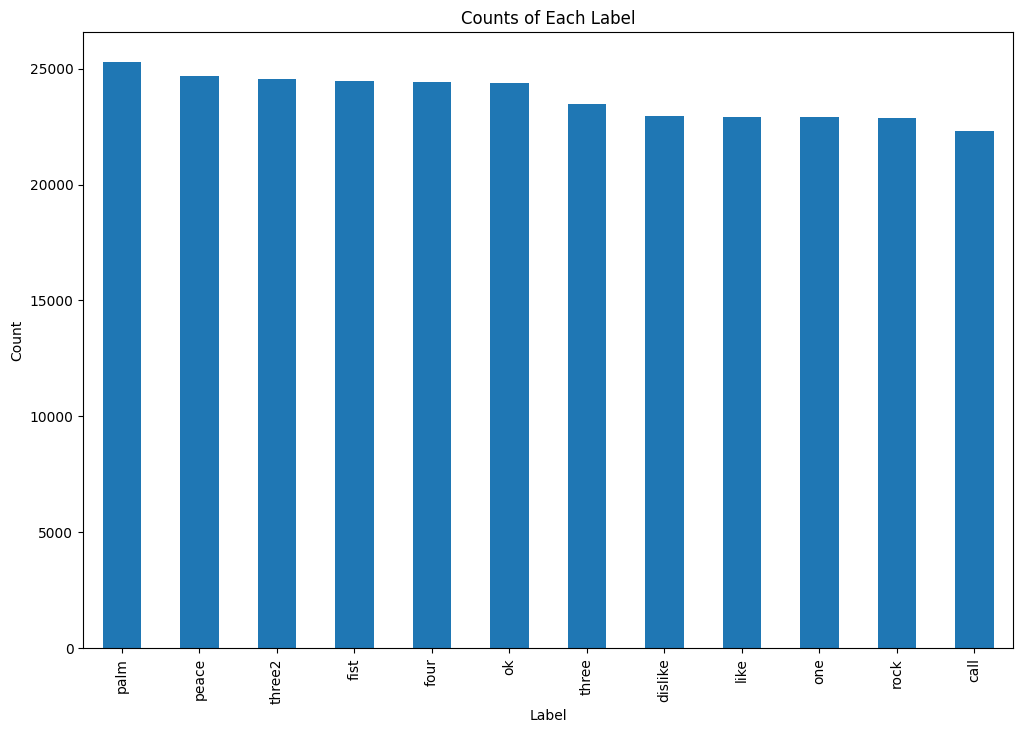

In [9]:
# Plot number of rows per value
label_counts = landmarks_df['label'].value_counts()
plt.figure(figsize=(12, 8))
label_counts.plot(kind='bar')
plt.title('Counts of Each Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

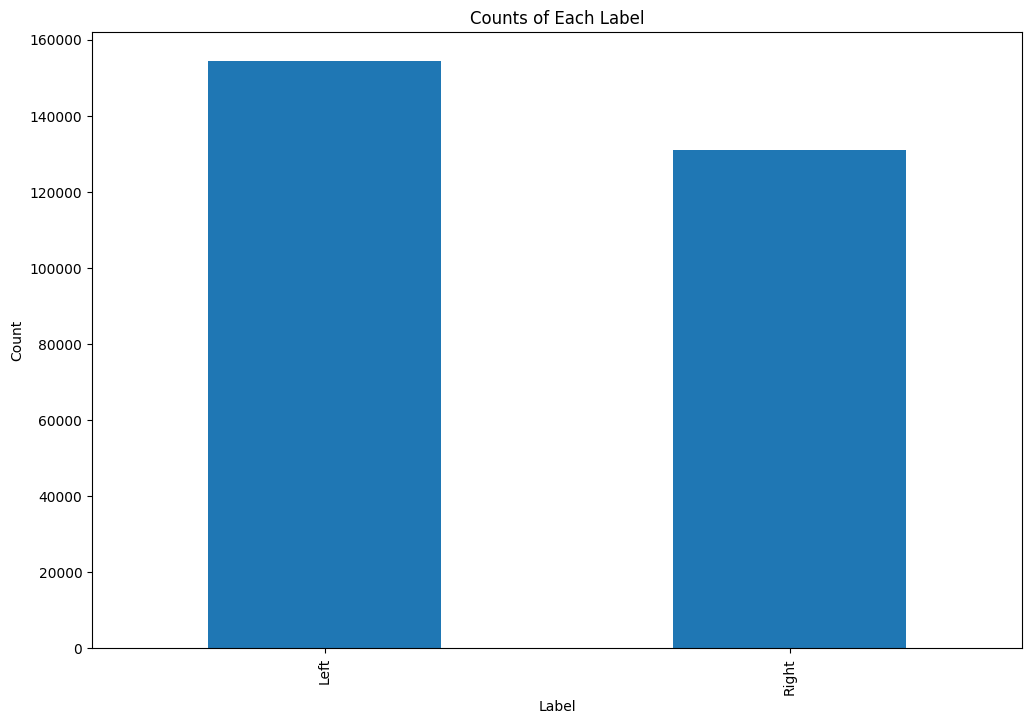

In [10]:
# Plot number of rows per hand
label_counts = landmarks_df['handedness'].value_counts()
plt.figure(figsize=(12, 8))
label_counts.plot(kind='bar')
plt.title('Counts of Each Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [11]:
# Going to ignore handedness for now, simply train off of the labels
landmarks_df['label'].value_counts()

label
palm       25307
peace      24670
three2     24557
fist       24486
four       24421
ok         24396
three      23490
dislike    22967
like       22896
one        22894
rock       22891
call       22319
Name: count, dtype: int64

In [12]:
target_count = 22319
df_label_balanced = landmarks_df.groupby('label').apply(lambda x: x.sample(n=target_count, replace=False if len(x) > target_count else True)).reset_index(drop=True)
df_label_balanced['label'].value_counts()

/tmp/ipykernel_258269/3128411163.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_label_balanced = df.groupby('label').apply(lambda x: x.sample(n=target_count, replace=False if len(x) > target_count else True)).reset_index(drop=True)


label
call       22319
dislike    22319
fist       22319
four       22319
like       22319
ok         22319
one        22319
palm       22319
peace      22319
rock       22319
three      22319
three2     22319
Name: count, dtype: int64

In [13]:
# Write to a new csv file
df_label_balanced.to_csv('../../data/HaGRID/modified/csv/train_label_balanced.csv', index=False, mode='w')

In [14]:
# Going to split by handedness now
landmarks_df['handedness'].value_counts()

handedness
Left     154291
Right    131003
Name: count, dtype: int64

In [15]:
# Left hands
df_left_hands = landmarks_df.drop(landmarks_df[landmarks_df['handedness'] == 'Left'].index)
# Right hands
df_right_hands = landmarks_df.drop(landmarks_df[landmarks_df['handedness'] == 'Right'].index)

In [16]:
df_left_hands['label'].value_counts()

label
palm       11468
three2     11445
fist       11249
peace      11160
four       11098
ok         11088
three      10802
dislike    10725
one        10541
rock       10537
call       10492
like       10398
Name: count, dtype: int64

In [17]:
target_count = 10398
df_left_label_balanced = landmarks_df.groupby('label').apply(lambda x: x.sample(n=target_count, replace=False if len(x) > target_count else True)).reset_index(drop=True)
df_left_label_balanced['label'].value_counts()

/tmp/ipykernel_258269/3953325461.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_left_label_balanced = df.groupby('label').apply(lambda x: x.sample(n=target_count, replace=False if len(x) > target_count else True)).reset_index(drop=True)


label
call       10398
dislike    10398
fist       10398
four       10398
like       10398
ok         10398
one        10398
palm       10398
peace      10398
rock       10398
three      10398
three2     10398
Name: count, dtype: int64

In [18]:
# Write to a new csv file
df_left_label_balanced.to_csv('../../data/HaGRID/modified/csv/train_left_label_balanced.csv', index=False, mode='w')